## Tic-Tac-Toe Agent


#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
# from <TC_Env> import <TicTacToe> - import your class from environment file
from TCGame_Env1 import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------

#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)


In [3]:
class Qlearning:
    # setting Hyper Parameters here    
    def __init__(self, epsilon=0.3, alpha=0.1, gamma=0.91, values=[]):
        self.epsilon=epsilon
        self.alpha=alpha
        self.gamma=gamma
        self.Q = {} #the Q table
        self.last_board=None
        self.q_last=0.0
        self.state_action_last=None
        self.values = values
        self.options = []

    # Reset 
    def game_begin(self):
        self.last_board = None
        self.q_last = 0.0
        self.state_action_last = None
        self.options = self.values.copy()

    # epsilon greedy strategy
    def epsilon_greedy(self, state, possible_moves): 
        #return the action
        self.last_board = tuple(state)
        if(random.random() < self.epsilon):
            move = random.choice(possible_moves) ##action
            self.state_action_last=(self.last_board,move)
            
            self.q_last=self.getQ(self.last_board,move)
            return move
        else: # greedy strategy
            Q_list=[]
            for action in possible_moves:
                Q_list.append(self.getQ(self.last_board,action))
            maxQ=max(Q_list)

            if Q_list.count(maxQ) > 1:
                # choose randomly from the best options
                best_options = [i for i in range(len(possible_moves)) if Q_list[i] == maxQ]
                i = random.choice(best_options)
            else:
                i = Q_list.index(maxQ)
            self.state_action_last = (self.last_board, possible_moves[i])
            self.q_last = self.getQ(self.last_board, possible_moves[i])
            return possible_moves[i]

    
    def getQ(self, state, action): #get the Q-states
        if(self.Q.get((state,action))) is None:
            self.Q[(state,action)] = 1.0
        return self.Q.get((state,action))

    def updateQ(self, reward, state, possible_moves): # update the Q-states 
        q_list=[]
        for moves in possible_moves:
            q_list.append(self.getQ(tuple(state), moves))
        if q_list:
            max_q_next = max(q_list)
        else:
            max_q_next = 0.0
        self.Q[self.state_action_last] = self.q_last + self.alpha * ((reward + self.gamma*max_q_next) - self.q_last)

    def saveQ(obj,file_name):  #save table
        with open(file_name +'.pkl', 'wb') as f:
            pickle.dump(obj, f, protocol=pickle.HIGHEST_PROTOCOL)
            print(len(obj.keys())) 
    

    def loadQ(self,file_name): # load pickle
        with open(file_name + '.pkl', 'rb') as f:
            self.Q = pickle.load(f)

#### Tracking the state-action pairs for checking convergence - write your code here

In [4]:
from TCGame_Env1 import TicTacToe

game = TicTacToe() #game instantiation
player1 =  Qlearning(values=[1,3,5,7,9]) #odd player learning agent
player2 =  Qlearning(values=[2,4,6,8])   #even player learning agent
game.startTraining(player1,player2, 500000, verbose=False) #training for 5 lakh iterations


Training Started
Training Completed


In [5]:
odd_player_Q, even_player_Q = game.getQ()

In [6]:
odd_player_Q

{((0, 0, 0, 0, 0, 0, 0, 0, 0), 1): -1.4223651472226624,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 2): -1.694900471986432,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 3): -0.46556108967199383,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 4): -1.761140653555524,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 5): -1.72236645541555,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 6): -1.2418506272172605,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 7): -1.2416693183973424,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 8): -1.280958511417355,
 ((0, 0, 0, 0, 0, 0, 0, 0, 0), 9): -2.171530963587054,
 ((0, 0, 0, 0, 0, 9, 0, 0, 0), 1): 1.0,
 ((0, 0, 0, 0, 0, 9, 0, 0, 0), 2): 1.0,
 ((0, 0, 0, 0, 0, 9, 0, 0, 0), 3): 1.0,
 ((0, 0, 0, 0, 0, 9, 0, 0, 0), 4): 1.0,
 ((0, 0, 0, 0, 0, 9, 0, 0, 0), 5): 1.0,
 ((0, 0, 0, 0, 0, 9, 0, 0, 0), 7): 1.0,
 ((0, 0, 0, 0, 0, 9, 0, 0, 0), 8): 1.0,
 ((0, 0, 0, 0, 0, 9, 0, 0, 0), 9): 1.0,
 ((4, 0, 0, 0, 0, 9, 0, 0, 0), 2): -2.394948096954958,
 ((4, 0, 0, 0, 0, 9, 0, 0, 0), 3): -2.508917336526271,
 ((4, 0, 0, 0, 0, 9, 0, 0, 0), 4): -2.9596465827440865,
 ((4, 0, 0, 0, 

In [7]:
even_player_Q

{((0, 0, 0, 0, 0, 9, 0, 0, 0), 1): -8.36564093041892,
 ((4, 0, 0, 0, 5, 9, 0, 0, 0), 2): 1.0,
 ((4, 0, 0, 0, 5, 9, 0, 0, 0), 3): 4.408049,
 ((4, 0, 0, 0, 5, 9, 0, 0, 0), 4): 1.0,
 ((4, 0, 0, 0, 5, 9, 0, 0, 0), 7): 1.0,
 ((4, 0, 0, 0, 5, 9, 0, 0, 0), 8): 1.0,
 ((4, 0, 0, 0, 5, 9, 0, 0, 0), 9): 1.0,
 ((4, 0, 0, 0, 5, 9, 0, 1, 2), 2): 1.0,
 ((4, 8, 7, 0, 5, 9, 0, 1, 2), 4): 1.0,
 ((4, 8, 7, 0, 5, 9, 0, 1, 2), 7): 0.9,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 1): -9.08999603865664,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 3): -9.08999510945264,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 4): -9.08999510945264,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 5): -9.089995598507377,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 6): -9.08999510945264,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 7): -9.08999510945264,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 8): -9.089995598507377,
 ((0, 5, 0, 0, 0, 0, 0, 0, 0), 9): -9.08999510945264,
 ((0, 5, 0, 8, 9, 0, 0, 0, 0), 8): -0.009000000000000119,
 ((0, 5, 1, 8, 9, 0, 0, 4, 0), 1): 1.0,
 ((2, 5, 1, 8, 9, 0, 0, 4, 3), 6): 1.0,
 ((2, 5, 

In [8]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 1)]

-1.4223651472226624

In [9]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 2)]

-1.694900471986432

In [10]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 3)]

-0.46556108967199383

In [11]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 4)]

-1.761140653555524

In [12]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 5)]

-1.72236645541555

In [13]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 6)]

-1.2418506272172605

In [14]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 7)]

-1.2416693183973424

In [15]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 8)]

-1.280958511417355

In [16]:
odd_player_Q[((0, 0, 0, 0, 0, 0, 0, 0, 0), 9)]

-2.171530963587054

# Epsilon - decay check

In [17]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

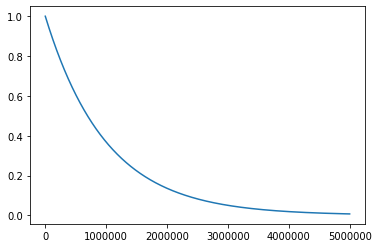

In [18]:
plt.plot(time, epsilon)
plt.show()